In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from random import gauss
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from statsmodels.formula.api import ols

This journal is just my take on what I wanted to look at for this project. 

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


To make this a little bit easier on myself, I will drop some columns that aren't relevant to my business question now. 

In [3]:
df.drop(['date', 'view','sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>],
       [<AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'lat'}>],
       [<AxesSubplot:title={'center':'long'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

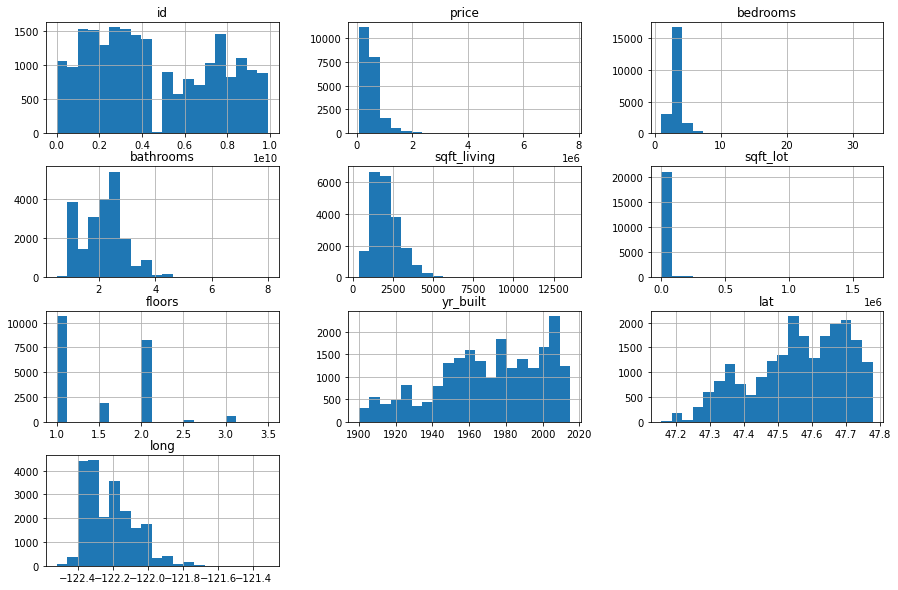

In [5]:
df.hist(bins=20, figsize=(15,10))

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

<AxesSubplot:xlabel='long', ylabel='lat'>

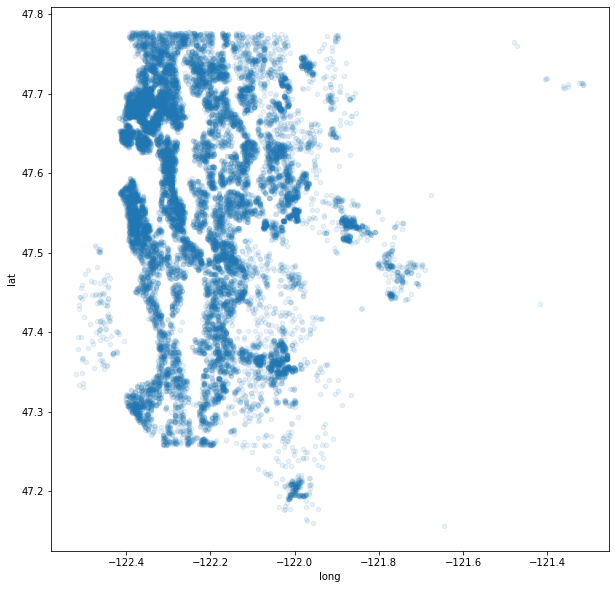

In [7]:
df.plot(kind='scatter', x='long', y='lat', alpha=0.1, figsize=(10,10))

In [8]:
df['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [9]:
df['waterfront'].fillna('-1', inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   21597 non-null  object 
 8   condition    21597 non-null  object 
 9   grade        21597 non-null  object 
 10  yr_built     21597 non-null  int64  
 11  lat          21597 non-null  float64
 12  long         21597 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 2.1+ MB


def norm_feat(series):
    return (series - series.mean())/series.std()
for feat in ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','yr_built']:
    df[feat] = norm_feat(df[feat])
df.describe()

In [11]:
feats = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','yr_built',
         'waterfront', 'condition', 'grade']
df = df[feats]
df = pd.get_dummies(df, drop_first=True)

In [12]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,3,1.00,1180,5650,1.0,1955,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,1951,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,510000.0,3,2.00,1680,8080,1.0,1987,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,waterfront_NO,waterfront_YES,condition_Fair,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.053953,-0.057305,0.264306,-0.051432,...,0.357589,0.291068,0.211806,-0.005155,-0.031618,-0.084549,-0.209463,-0.316053,0.004576,0.235859
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.155670,0.004858,-0.002127,-0.049463,...,0.116596,0.062257,0.039026,-0.017434,-0.068012,-0.113175,-0.239492,-0.104791,0.073140,0.160294
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.507173,-0.011744,0.063629,-0.075933,...,0.247293,0.159734,0.095118,-0.012087,-0.055599,-0.138740,-0.366185,-0.313457,0.189426,0.264756
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.318152,-0.020362,0.104637,-0.063984,...,0.345964,0.238136,0.144424,-0.011565,-0.053935,-0.127198,-0.312486,-0.358915,0.071115,0.318499
sqft_lot,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.052946,-0.007191,0.021459,0.037871,...,0.077104,0.061699,0.007767,-0.000348,0.000440,0.022931,-0.019116,-0.067791,-0.023923,0.049646
floors,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.489193,-0.000505,0.020797,-0.055337,...,0.118735,0.054276,0.021257,-0.006230,-0.029964,-0.080346,-0.230529,-0.308247,0.201188,0.244184
yr_built,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,1.000000,0.010033,-0.024487,-0.066977,...,0.098762,0.046874,0.004692,-0.011814,-0.041843,-0.128815,-0.313501,-0.211966,0.199844,0.220104
waterfront_NO,-0.057305,0.004858,-0.011744,-0.020362,-0.007191,-0.000505,0.010033,1.000000,-0.226888,0.001390,...,-0.015425,-0.014870,0.008924,0.002474,0.004704,-0.007863,-0.000006,0.007882,0.006494,-0.005141
waterfront_YES,0.264306,-0.002127,0.063629,0.104637,0.021459,0.020797,-0.024487,-0.226888,1.000000,-0.000954,...,0.068410,0.082899,-0.002025,-0.000561,-0.002919,0.012691,-0.007301,-0.045482,-0.011317,0.007487
condition_Fair,-0.051432,-0.049463,-0.075933,-0.063984,0.037871,-0.055337,-0.066977,0.001390,-0.000954,1.000000,...,-0.012220,-0.005730,-0.002186,-0.000606,0.056160,0.065184,0.076994,0.004637,-0.040504,-0.029848


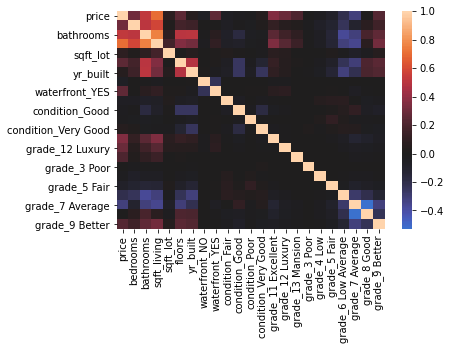

In [14]:
sns.heatmap(df.corr(), center=0);

In [15]:
df.corr()['price'].sort_values(ascending=False)

price                  1.000000
sqft_living            0.701917
bathrooms              0.525906
grade_11 Excellent     0.357589
bedrooms               0.308787
grade_12 Luxury        0.291068
waterfront_YES         0.264306
floors                 0.256804
grade_9 Better         0.235859
grade_13 Mansion       0.211806
sqft_lot               0.089876
condition_Very Good    0.057531
yr_built               0.053953
grade_8 Good           0.004576
grade_3 Poor          -0.005155
condition_Poor        -0.019886
condition_Good        -0.030759
grade_4 Low           -0.031618
condition_Fair        -0.051432
waterfront_NO         -0.057305
grade_5 Fair          -0.084549
grade_6 Low Average   -0.209463
grade_7 Average       -0.316053
Name: price, dtype: float64

In [16]:
X, y = df.drop('price', axis=1), df['price']

In [17]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.881
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              7230.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):                        0.00
Time:                        00:20:38   Log-Likelihood:                     -2.9688e+05
No. Observations:               21597   AIC:                                  5.938e+05
Df Residuals:                   21575   BIC:                                  5.940e+05
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
bedrooms            -1.966e+04   2157.377     -9.112      0.000   -2.39e+04   -1.54e+04
bathrooms            1234.7830   3463.324      0.357      0.721   -5553.589    8023.155
sqft_living           173.0343      3.508     49.320      0.000     166.158     179.911
sqft_lot               -0.3568      0.038     -9.376      0.000      -0.431      -0.282
floors              -2181.7096   3582.314     -0.609      0.543   -9203.310    4839.891
yr_built              247.3109      7.137     34.653      0.000     233.322     261.300
waterfront_NO        6491.6910   4913.729      1.321      0.186   -3139.582    1.61e+04
waterfront_YES       7.925e+05   1.95e+04     40.698      0.000    7.54e+05    8.31e+05
condition_Fair       1.064e+04   1.76e+04      0.604      0.546   -2.39e+04    4.52e+04
condition_Good       6.204e+04   3730.791     16.628      0.000    5.47e+04    6.93e+04
condition_Poor       4.745e+04   4.23e+04      1.121      0.262   -3.55e+04     1.3e+05
condition_Very Good  1.474e+05   5926.468     24.877      0.000    1.36e+05    1.59e+05
grade_11 Excellent    2.84e+05   1.34e+04     21.206      0.000    2.58e+05     3.1e+05
grade_12 Luxury      7.562e+05   2.56e+04     29.579      0.000    7.06e+05    8.06e+05
grade_13 Mansion     2.014e+06   6.41e+04     31.421      0.000    1.89e+06    2.14e+06
grade_3 Poor        -4.312e+05   2.26e+05     -1.906      0.057   -8.75e+05    1.23e+04
grade_4 Low         -3.789e+05   4.48e+04     -8.465      0.000   -4.67e+05   -2.91e+05
grade_5 Fair        -4.071e+05   1.76e+04    -23.126      0.000   -4.42e+05   -3.73e+05
grade_6 Low Average -3.754e+05   1.07e+04    -35.127      0.000   -3.96e+05   -3.54e+05
grade_7 Average     -3.475e+05   8898.960    -39.054      0.000   -3.65e+05    -3.3e+05
grade_8 Good        -2.845e+05   8225.439    -34.593      0.000   -3.01e+05   -2.68e+05
grade_9 Better      -1.621e+05   8251.608    -19.643      0.000   -1.78e+05   -1.46e+05
==============================================================================
Omnibus:                    11406.235   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           262507.655
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      19.579   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 6.49e+06. This might indicate that there are
strong multicollinearity or other n

<AxesSubplot:>

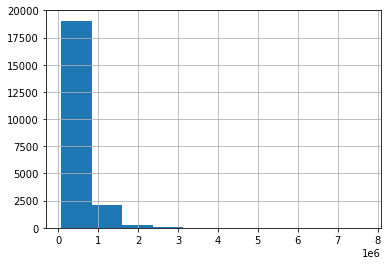

In [18]:
y.hist()

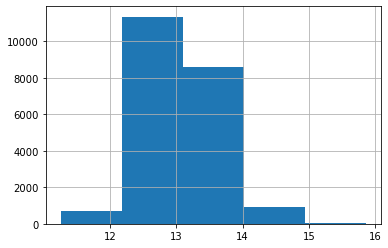

In [19]:
y_scld = np.log(y)
y_scld.hist(bins=5)
y = y_scld

In [20]:
X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1786.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:20:39   Log-Likelihood:                -5591.0
No. Observations:               21597   AIC:                         1.123e+04
Df Residuals:                   21574   BIC:                         1.141e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  24.8715      0.192    129.805      0.000      24.496      25.247
bedrooms               -0.0341      0.003    -11.343      0.000      -0.040      -0.028
bathrooms               0.0838      0.005     16.724      0.000       0.074       0.094
sqft_living             0.0002   4.93e-06     38.951      0.000       0.000       0.000
sqft_lot            -2.661e-08   5.29e-08     -0.503      0.615    -1.3e-07    7.71e-08
floors                  0.0718      0.005     14.269      0.000       0.062       0.082
yr_built               -0.0060   9.75e-05    -61.975      0.000      -0.006      -0.006
waterfront_NO        2.727e-05      0.007      0.004      0.997      -0.013       0.013
waterfront_YES          0.5206      0.027     19.226      0.000       0.468       0.574
condition_Fair         -0.1725      0.024     -7.046      0.000      -0.221      -0.125
condition_Good          0.0198      0.005      3.734      0.000       0.009       0.030
condition_Poor         -0.1407      0.059     -2.393      0.017      -0.256      -0.025
condition_Very Good     0.0867      0.009     10.137      0.000       0.070       0.103
grade_11 Excellent      0.1284      0.019      6.904      0.000       0.092       0.165
grade_12 Luxury         0.2315      0.035      6.522      0.000       0.162       0.301
grade_13 Mansion        0.2545      0.089      2.859      0.004       0.080       0.429
grade_3 Poor           -1.0846      0.314     -3.453      0.001      -1.700      -0.469
grade_4 Low            -1.2187      0.062    -19.564      0.000      -1.341      -1.097
grade_5 Fair           -1.1471      0.025    -46.300      0.000      -1.196      -1.099
grade_6 Low Average    -0.9292      0.015    -60.934      0.000      -0.959      -0.899
grade_7 Average        -0.6474      0.013    -51.692      0.000      -0.672      -0.623
grade_8 Good           -0.4025      0.011    -35.052      0.000      -0.425      -0.380
grade_9 Better         -0.1626      0.011    -14.182      0.000      -0.185      -0.140
==============================================================================
Omnibus:                       95.011   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.447
Skew:                          -0.079   Prob(JB):                     1.15e-26
Kurtosis:                       3.328   Cond. No.                     6.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
df.drop(['waterfront_NO', 'sqft_lot'], axis=1, inplace=True)

In [22]:
X, y = df.drop('price', axis=1), df['price']

In [23]:
X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2209.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:20:39   Log-Likelihood:            -2.9536e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21576   BIC:                         5.909e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 7.46e+06   1.28e+05     58.089      0.000    7.21e+06    7.71e+06
bedrooms            -2.727e+04   2010.647    -13.563      0.000   -3.12e+04   -2.33e+04
bathrooms            5.637e+04   3360.221     16.776      0.000    4.98e+04     6.3e+04
sqft_living           140.1247      3.273     42.808      0.000     133.709     146.541
floors               2.987e+04   3374.015      8.852      0.000    2.33e+04    3.65e+04
yr_built            -3530.1459     65.340    -54.028      0.000   -3658.216   -3402.076
waterfront_YES        7.33e+05   1.77e+04     41.376      0.000    6.98e+05    7.68e+05
condition_Fair       -3.73e+04   1.64e+04     -2.271      0.023   -6.95e+04   -5112.729
condition_Good       1.678e+04   3560.653      4.712      0.000    9800.404    2.38e+04
condition_Poor      -3.659e+04   3.95e+04     -0.927      0.354   -1.14e+05    4.07e+04
condition_Very Good  5.687e+04   5741.239      9.906      0.000    4.56e+04    6.81e+04
grade_11 Excellent   2.731e+05   1.25e+04     21.884      0.000    2.49e+05    2.98e+05
grade_12 Luxury      7.529e+05   2.38e+04     31.604      0.000    7.06e+05       8e+05
grade_13 Mansion     1.964e+06   5.97e+04     32.877      0.000    1.85e+06    2.08e+06
grade_3 Poor        -5.947e+05   2.11e+05     -2.821      0.005   -1.01e+06   -1.81e+05
grade_4 Low         -5.461e+05   4.18e+04    -13.062      0.000   -6.28e+05   -4.64e+05
grade_5 Fair        -5.692e+05   1.66e+04    -34.247      0.000   -6.02e+05   -5.37e+05
grade_6 Low Average -5.127e+05   1.02e+04    -50.096      0.000   -5.33e+05   -4.93e+05
grade_7 Average     -4.273e+05   8406.315    -50.829      0.000   -4.44e+05   -4.11e+05
grade_8 Good        -3.306e+05   7706.668    -42.903      0.000   -3.46e+05   -3.16e+05
grade_9 Better       -1.83e+05   7697.638    -23.774      0.000   -1.98e+05   -1.68e+05
==============================================================================
Omnibus:                    12290.195   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403922.323
Skew:                           2.164   Prob(JB):                         0.00
Kurtosis:                      23.740   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
df.drop(['condition_Poor','condition_Fair'], axis=1, inplace=True)

In [25]:
X, y = df.drop('price', axis=1), df['price']

In [26]:
X = sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     2454.
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        00:20:39   Log-Likelihood:            -2.9536e+05
No. Observations:               21597   AIC:                         5.908e+05
Df Residuals:                   21578   BIC:                         5.909e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.444e+06   1.28e+05     58.044      0.000    7.19e+06    7.69e+06
bedrooms            -2.726e+04   2010.803    -13.555      0.000   -3.12e+04   -2.33e+04
bathrooms            5.643e+04   3360.440     16.792      0.000    4.98e+04     6.3e+04
sqft_living           140.1068      3.274     42.799      0.000     133.690     146.523
floors               3.004e+04   3373.455      8.905      0.000    2.34e+04    3.67e+04
yr_built            -3522.2329     65.255    -53.976      0.000   -3650.137   -3394.328
waterfront_YES       7.327e+05   1.77e+04     41.361      0.000    6.98e+05    7.67e+05
condition_Good       1.762e+04   3544.270      4.971      0.000    1.07e+04    2.46e+04
condition_Very Good  5.782e+04   5728.369     10.094      0.000    4.66e+04    6.91e+04
grade_11 Excellent   2.731e+05   1.25e+04     21.885      0.000    2.49e+05    2.98e+05
grade_12 Luxury      7.529e+05   2.38e+04     31.602      0.000    7.06e+05       8e+05
grade_13 Mansion     1.964e+06   5.97e+04     32.876      0.000    1.85e+06    2.08e+06
grade_3 Poor        -5.946e+05   2.11e+05     -2.820      0.005   -1.01e+06   -1.81e+05
grade_4 Low         -5.524e+05   4.17e+04    -13.237      0.000   -6.34e+05   -4.71e+05
grade_5 Fair        -5.724e+05   1.65e+04    -34.608      0.000   -6.05e+05    -5.4e+05
grade_6 Low Average -5.135e+05   1.02e+04    -50.206      0.000   -5.34e+05   -4.93e+05
grade_7 Average     -4.274e+05   8406.955    -50.838      0.000   -4.44e+05   -4.11e+05
grade_8 Good        -3.306e+05   7707.327    -42.898      0.000   -3.46e+05   -3.16e+05
grade_9 Better       -1.83e+05   7698.309    -23.767      0.000   -1.98e+05   -1.68e+05
==============================================================================
Omnibus:                    12283.789   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           403374.174
Skew:                           2.162   Prob(JB):                         0.00
Kurtosis:                      23.726   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
ss = StandardScaler()

In [28]:
ss.fit(X)

X_scaled = ss.transform(X)

In [29]:
lr = LinearRegression()
lr.fit(X_scaled, y)

LinearRegression()

In [30]:
lr.score(X_scaled, y)

0.6718254253669769

In [31]:
y_hat = lr.predict(X_scaled)
y_hat

array([300197.84705633, 609610.79522902, 261350.29410641, ...,
       130768.60987005, 397901.47987677, 134290.8427642 ])

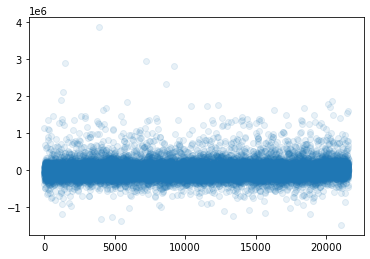

In [32]:
resid = (y - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1)

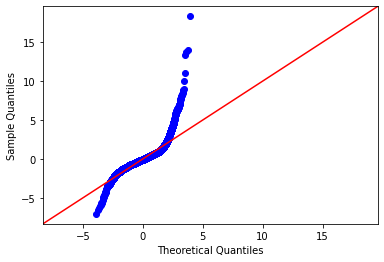

In [34]:
fig = sm.graphics.qqplot(model4.resid, dist=stats.norm, line='45', fit=True)